## Исследование данных о российском кинопрокате



**Цель исследования:** изучения рынка российского кинопроката и выявление текущих трендов.

**Задачи исследования:**
1. Предварительно обработать данные для устранения пропусков, аномалий и других дефектов, если это возможно и целесообразно.
2. Определить, сколько фильмов выходило каждый год и как менялась динамика проката по годам.
3. Определить, как влияет государственная поддержка на финансовые результаты фильмов и оценку зрителей.

**Объект исследования:** открытые данные Министерства культуры Российской Федерации и сайта КиноПоиск о прокатных удостоверениях, сборах и государственной поддержке фильмов.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_movies = pd.read_csv('/datasets/mkrf_movies.csv')
data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

**1.1.1 Предварительный просмотр данных.**

In [ ]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [ ]:
data_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [ ]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [ ]:
data_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


**1.1.2 Совмещение таблиц.**

В обоих таблицах присутствует столбец puNumber, по нему и объединим таблицы. Однако в обоих таблицах он имеет разный тип значений. Его необходимо привести к одному типу.

In [ ]:
data_shows['puNumber'] = data_shows['puNumber'].astype('string')
data_movies['puNumber'] = data_movies['puNumber'].astype('string')

Удалим возможные пробелы в значениях таблицы.

In [ ]:
data_movies['puNumber'] = data_movies['puNumber'].str.strip()
data_shows['puNumber'] = data_shows['puNumber'].str.strip()

Теперь можно совместить таблицы.

In [ ]:
data = data_movies.merge(data_shows, on='puNumber', how='outer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   string 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Итог:** таблица data_shows успешно встроена в таблицу data_movies.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

**1.2.1.1 Проверка типов данных.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   string 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Из тех столбцов, с которыми будем в дальнейшем работать неправильный тип данных в следующих столбцах:
1. show_start_date: сейчас object, а должен быть datetime.
2. director: сейчас object, а должен быть string. Однако сейчас изменить тип невозможно из-за пропусков.
3. ratings: сейчас object, а должен быть float. Однако сейчас изменить тип невозможно из-за пропусков и аномальных значений.
4. genres: сейчас object, а должен быть string. Однако сейчас изменить тип невозможно из-за пропусков.

**1.2.1.2 Изменение типов данных в show_start_date**

Сперва изменим названия столбцов для корректности.

In [ ]:
data = data.rename(columns={'puNumber': 'pu_number'})

Теперь изменим формат в show_start_date.

In [ ]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M:%S')

**1.2.1.3 Изменение типов данных в ratings**

Сперва посмотрим, какие типы данных встречаются в этом столбце.

In [ ]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце с рейтингами есть некорректные значения - среди значений формата десячной дроби есть значения в процентах. Исходя из информации из открытых источников информации это рейтинг ожиданий и пересчитать его в 10-бальную систему не получится. В связи с этим предлагается их заменить на пустые значения, чтобы они не попали в анализ.

In [ ]:
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce', downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   string             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Итог:** в столбцах show_start_date и ratings формат изменен.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [ ]:
control = data.copy()
len(control)

7486

**1.2.2.1 Поиск пропусков.**

На основании информации из предыдущего пункта пропуски есть в следующих столбцах:
- production_country
- director
- producer
- refundable_support
- nonrefundable_support
- budget
- financing_source
- ratings
- genres
- box_office

Начнем с production_country, director, producer, genres. Заменим пропуски на заглушку "Не установлен / Не установлена", чтобы потом в общем анализе оценить, сколько фильмов не вошло в общую статистику.

In [ ]:
replace_list = ['production_country', 'director', 'producer', 'genres']

for i in replace_list:
    data[i] = data[i].fillna('Нет информации')
data.info()
#Предыдущая версия:
#data['production_country'] = data['production_country'].fillna('Не установлена')
#data['director'] = data['director'].fillna('Не установлен')
#data['producer'] = data['producer'].fillna('Не установлен')
#data['genres'] = data['genres'].fillna('Не установлен')
#data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   string             
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7486 non-null   object             
 6   director               7486 non-null   object             
 7   producer               7486 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Проверим, не потерялись ли значения при обработке пропусков.

In [ ]:
len(control) - len(data)

0

Длина одинаковая, соответственно потерянных данных нет.

**Итог:** Пропуски заполнены.
В оставшихся столбцах заполнить пропуски невозможно по следующим причинам:
- в refundable_support, nonrefundable_support, budget, financing_source, box_office мало информации для расчета среднего, медианы.
- ratings у каждого фильма рейтинг индивидуальный и заполнять медианной некорректно.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**1.2.3.1 Проверка на полные дубликаты строк.**

In [ ]:
data.duplicated().sum()

0

Полных дубликатов нет.

**1.2.3.2 Проверка на дубликаты строк по основным строкам, идентифицирующие фильм.**

In [ ]:
data.duplicated(subset=['title', 'pu_number', 'show_start_date']).sum()

0

Дубликатов по основным столбцам (названиям, прокатному удостоверению, дате запуска) нет.

**1.2.3.3 Проверка отдельно по каждому столбцу.**

**Проверим столбец title.**

In [ ]:
data['title'].duplicated().sum()

714

In [ ]:
data['title'].value_counts()

День святого Валентина_            5
Жена путешественника во времени    4
Лузеры                             4
Знакомство с Факерами 2.           4
Непокоренный.                      4
                                  ..
Монах и бес                        1
Цирк .                             1
Каждому своё                       1
Этот неловкий момент.              1
Пиковая дама: Черный обряд         1
Name: title, Length: 6772, dtype: int64

In [ ]:
data.query('title == "Жена путешественника во времени"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3794,Жена путешественника во времени,221010310,2010-01-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,фэнтези,драма",NaN
4077,Жена путешественника во времени,221004110,2010-01-19 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,фэнтези,драма",NaN
4096,Жена путешественника во времени,221055510,2010-04-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,фэнтези,драма",NaN
4829,Жена путешественника во времени,221014211,2011-01-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Плэн Би",США,Роберт Швентке,"Деде Гарднер, Ник Уэкслер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,фэнтези,драма",NaN


Как видно, одному и тому же фильму (для примера возьмем фильм "Жена путешественника во времени") выдали 4 удостоверений с разными номерами. Предположительная причина: фильм запускался несколько и каждый раз получал новое прокатное удостоверение. В пользу этого говорят разные даты запуска проката в столбце show_start_date. Более того, между датами разница почти в год: фильм запускался и в 2010 и в 2011 годах.
Посмотрим, нет ли дубликатов в столбце pu_number.

**Проверим столбец pu_number.**

In [ ]:
data['pu_number'].value_counts()

221054410    2
221154310    2
121021610    1
121015405    1
121010413    1
            ..
221003315    1
121013015    1
121008010    1
121028712    1
221116110    1
Name: pu_number, Length: 7484, dtype: Int64

Есть два дубликата, то есть дважды прокатные удостоверения выдали с одним и тем же номером. Посмотрим, в каких строках.

In [ ]:
data.query('pu_number == "221154310" | pu_number == "221054410"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Очевидно следующее:
1. Прокатное удостверение 221154310 было выдано двум разным фильмам, но вышли они в один день. Возможно, ошибка при записи в базу.
2. Удостоверение 221054410 соответствует только одному фильму - "Анализируй это!". Анализ других столбцов, соответствующих этому фильму указывают, что это дубликат и появился он из-за некорректной записи в других столбцах. Так, Гарольд превратился в Хэрольд. Поиск по интернету указал, что запись 12+ ошибочна, так как фильм имеет рейтинг 16+, соответственно вторую строку можно удалить.

In [ ]:
data = data.loc[data['director'] != 'Гарольд Реймис']

Другие столбцы могут содержать сведения, которые могут быть не уникальными и удаление дубликатов там не требуется.

**Итог:**
1. Некоторые фильмы в базе присутствуют несколько раз. Возможная причина: фильмы выходили несколько раз в разное время.
2. Дубликаты прокатных удостоверений появились из-за ошибка при записи в базу данных.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

**1.2.4.1 Проблемные значения в столбце type.**

In [ ]:
data['type'].value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

В столбце type встречаются пробелы. Устраним их.

In [ ]:
data['type'] = data['type'].str.strip()
data['type'].value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Пробелов больше нет. Посмотрим другие столбцы.

**1.2.4.2 Проблемные значения в столбце age_restriction.**

In [ ]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

В столбце age_restriction отклонений не замечано.

**1.2.4.3 Проблемные значения в других столбцах.**

In [ ]:
data['production_country'].value_counts()

США                                          2171
Россия                                       1821
СССР                                          347
Франция                                       301
Великобритания                                257
                                             ... 
Франция - Сенегал - Бельгия                     1
Франция-Индия                                   1
США-Ирландия                                    1
Франция - США - Норвегия - Дания                1
Великобритания - Франция - Германия - США       1
Name: production_country, Length: 951, dtype: int64

In [ ]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

In [ ]:
data['genres'].value_counts()

Нет информации                      976
драма                               476
комедия                             352
мелодрама,комедия                   222
драма,мелодрама,комедия             189
                                   ... 
короткометражка,мелодрама             1
драма,военный,триллер                 1
короткометражка,комедия,криминал      1
документальный,ужасы,боевик           1
фантастика,боевик,детектив            1
Name: genres, Length: 743, dtype: int64

В столбцах production_country, financing_source, genres есть проблема: в строках может быть больше одного значения и отнести к какой-то одной группе будет сложно.

**Итог:**
1. Столбце type исправлены пробелы.
2. В столбцах production_country, financing_source, genres обнаружена проблема: в одну и ту же ячейку записаны несколько значений.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

**1.2.5.1 Работа со столбцом box_office.**

In [ ]:
data['box_office'].describe()

count    3.158000e+03
mean     7.647870e+07
std      2.403531e+08
min      0.000000e+00
25%      8.623900e+04
50%      2.327988e+06
75%      2.397967e+07
max      3.073569e+09
Name: box_office, dtype: float64

In [ ]:
data['box_office'].value_counts()

0.0            24
200.0          13
300.0          12
360.0           9
400.0           8
               ..
9585014.0       1
809638458.6     1
220728.0        1
11332412.0      1
52984377.0      1
Name: box_office, Length: 2938, dtype: int64

Возможно, в столбце box_office (доходы от проката) ошибка и некоторые значения "потеряли" порядки. Так, 200 скорее всего должно быть 200 000 по аналогии с остальными значениями. Проверим, сколько малых значений в данных.

In [ ]:
data.query('box_office < 1000')['box_office'].count()

231

Таких значений действительно мало (231), а медианное значение около 200 000. Поэтому кажется правильным внести коррективы в малые значения.

In [ ]:
def box_corr(box):
    if box['box_office'] < 1000:
        return box['box_office'] * 1000
    else:
        return box['box_office']

data['box_office'] = data.apply(box_corr, axis=1)
data['box_office'].value_counts()

0.00          24
200000.00     13
300000.00     12
360000.00      9
400000.00      8
              ..
60840.00       1
1154562.50     1
4827.00        1
2525662.30     1
1307120.01     1
Name: box_office, Length: 2938, dtype: int64

Значения исправлены, теперь кажутся более адекватными.

**1.2.5.2 Работа со столбцами refundable_support, nonrefundable_support и budget.**

In [ ]:
data['budget'].value_counts()

0.0            17
38000000.0      6
80000000.0      4
50000000.0      4
40000000.0      3
               ..
49280496.0      1
56693559.0      1
57166797.0      1
109814241.0     1
42252509.0      1
Name: budget, Length: 290, dtype: int64

In [ ]:
data['budget'].describe()

count    3.320000e+02
mean     1.272297e+08
std      1.885883e+08
min      0.000000e+00
25%      4.200000e+07
50%      6.864992e+07
75%      1.419853e+08
max      2.305074e+09
Name: budget, dtype: float64

В 17 фильмах бюджет равен 0. Вряд ли это так, скорее всего значения не поступили из источника. Посмотрим, есть ли среди фильмов с нулевым бюджетом фильмы с гос. поддержкой.

In [ ]:
data.query('budget == 0').pivot_table(index='budget', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')

,nonrefundable_support,refundable_support
budget,,
0.0,1.107969e+09,284000000.0


Есть такие фильмы, где бюджет 0, а гос.поддержка значительна. Посмотрим, есть ли случаи, когда бюджет равен гос.поддержке.

In [ ]:
data.loc[data['refundable_support'] + data['nonrefundable_support'] ==  data['budget']]['budget'].count()

0

Таких случаев нет, значит нельзя нулевые значения бюджета приравнять к объему гос.поддержки, так как значения всё равно будут некорректные.  
Теперь посмотрим, есть ли странные значения в столбцах refundable_support и nonrefundable_support.

In [ ]:
data['refundable_support'].describe()

count    3.320000e+02
mean     1.186446e+07
std      2.491656e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
max      1.800000e+08
Name: refundable_support, dtype: float64

In [ ]:
data['nonrefundable_support'].describe()

count    3.320000e+02
mean     4.898099e+07
std      5.998012e+07
min      0.000000e+00
25%      2.500000e+07
50%      3.000000e+07
75%      4.037500e+07
max      4.000000e+08
Name: nonrefundable_support, dtype: float64

Аномальных значений нет, но средства, которые предоставляются на невозвратной основе, больше, чем средства на возвратной основе.
Теперь посмотрим, есть ли случаи, когда гос. поддержка больше бюджета, не считая нулевые значения бюджета.

In [ ]:
data.loc[(data['refundable_support'] + data['nonrefundable_support'] >  data['budget']) & (data['budget'] != 0)]['budget'].count()

0

Таких случаев нет, что говорит об адекватности остальных строк. Было бы странно, если бы гос.поддержка была бы больше общего бюджета фильма.  
Итого получается, что заполнить нулевые значения в столбце "бюджет" корректно не получится, так как ни медианное значение, ни среднее, ни уровень гос. поддержки не будет адекватно описывать действительность.

**1.2.5.3 Работа со столбцом ratings.**

Оценим столбец с рейтингами.

In [ ]:
data['ratings'].value_counts()

6.6    312
6.7    308
6.8    260
7.2    252
6.2    243
      ... 
1.0      1
9.2      1
9.1      1
1.9      1
1.3      1
Name: ratings, Length: 80, dtype: int64

Оценим сколько вообще пропущенных значений.

In [ ]:
data['ratings'].isna().sum()

996

Слишком много пропущенных значений, чтобы их можно было удалить, а замена на любое значение будет некорректна. Придется оставить как есть.

**1.2.5.4 Работа со столбцом show_start_date.**

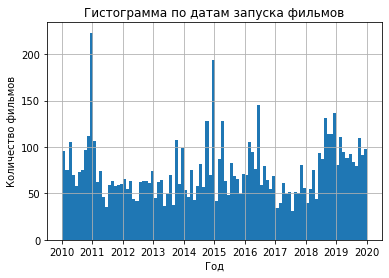

In [ ]:
data['show_start_date'].hist(bins=100)
plt.title('Гистограмма по датам запуска фильмов')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

In [ ]:
data['show_start_date'].value_counts()

2010-12-17 12:00:00+00:00    96
2014-12-01 12:00:00+00:00    71
2014-12-24 12:00:00+00:00    61
2016-06-07 12:00:00+00:00    41
2013-12-19 12:00:00+00:00    39
                             ..
2014-10-24 12:00:00+00:00     1
2011-10-28 12:00:00+00:00     1
2010-07-13 12:00:00+00:00     1
2012-04-16 12:00:00+00:00     1
2019-06-26 12:00:00+00:00     1
Name: show_start_date, Length: 1965, dtype: int64

На диаграмме два пика: в декабре 2010 года и в декабре 2014 года. В первом случае вышло более 200 фильмов. При этом среднее значение примерно около 50 фильмов. Причина: либо предновогодний ажиотаж (хотя в другие года не подтверждается), либо отложенный выход фильмов по другим причинами. В общем случае аномалий не наблюдается.

**1.2.5.5 Работа со столбцом pu_number.**

В столбце pu_number есть странное значение "нет", заменим его на числовое без потери смысла.

In [ ]:
data.query('pu_number == "нет"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),нет,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,Нет информации,NaN


In [ ]:
data['pu_number'] = data['pu_number'].replace('нет', '0')
data.query('pu_number == "нет"')['pu_number'].count()

0

Замена произведена.

**Итог:** в столбцах были откорректированы аномальные и странные значения.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

**1.2.6.1 Создание столбца с годом премьеры фильма.**

In [ ]:
data['show_year'] = data['show_start_date'].dt.year
data['show_year'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: show_year, dtype: int64

Столбец создан.

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

**1.2.6.2 Создание столбца с именем главного режиссера.**

In [ ]:
data['director'] = pd.Series(data['director'], dtype = 'string')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   string             
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7485 non-null   object             
 6   director               7485 non-null   string             
 7   producer               7485 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [ ]:
def new_columns(columns):
    if ',' in columns['director']:
        columns['director'] = pd.Series(columns['director'], dtype = 'string')
        return columns['director'].str.split(',').str[0]
    else:
        return columns['director']

data['main_director'] = data.apply(new_columns, axis=1)
data['main_director'].head()

0        Кевин Костнер
1            Е.Матвеев
2    Тимур Бекмамбетов
3    Тимур Бекмамбетов
4    Тимур Бекмамбетов
Name: main_director, dtype: object

Столбец создан.

**1.2.6.3 Создание столбца с главным жанром фильма.**

In [ ]:
def new_genre(columns):
    if ',' in columns['genres']:
        columns['genres'] = pd.Series(columns['genres'], dtype = 'string')
        return columns['genres'].str.split(',').str[0]
    else:
        return columns['genres']
data['main_genre'] = data.apply(new_genre, axis=1)
data['main_genre'].head()


0        боевик
1         драма
2    фантастика
3    фантастика
4    фантастика
Name: main_genre, dtype: object

In [ ]:
data.head(5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет информации,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


Оба столбца созданы.

**1.2.6.4 Создание столбца с возрастными ограничениями.**

Для удобства работы создадим ещё один столбец с возрастными ограничениями.

In [ ]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

In [ ]:
data['age'] = data['age_restriction'].str.split('-').str[0]
data['age'].head()

0    «18+» 
1     «6+» 
2    «18+» 
3    «18+» 
4    «18+» 
Name: age, dtype: object

Столбец создан.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

**1.2.6.5 Создание столбца с долей государственной поддержки в общем бюджете фильма.**

In [ ]:
data['ratio_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_year,main_director,main_genre,age,ratio_budget
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,«18+»,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Нет информации,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,«6+»,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,«18+»,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,«18+»,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,«18+»,NaN


Столбец создан.

**Итог:** нужные столбцы созданы.

**Итог по предобработке данных:**
1. В четырех столбцах заполнены пропуски.
2. Исправлены аномальные значения в столбце box_office.
3. Проверено наличие дубликатов.
4. Добавлены новые столбцы для последующего анализа.
5. Проверена корректность записей в столбцах с бюджетами фильмов и объемом государственной поддержки.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

**1.3.1 Общая доля фильмов в прокате.**

Будем считать, что столбец box_office является подтверждением о прокате фильма в кинотеатре.

In [ ]:
data['box_office'].notna().sum()

3158

In [ ]:
(data['box_office'].notna().sum()) / (data['show_year'].count())

0.42191048764195055

3158 фильма или 42% только были показаны в кинотеатре. Посмотрим, как менялась доля по годам.

**1.3.2 Изменение доли фильмов в прокате по годам.**

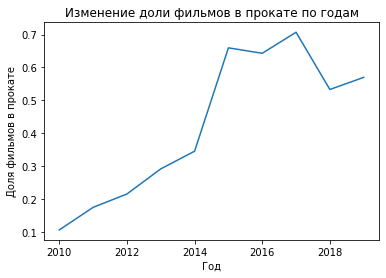

In [ ]:
stat_box_office = data.pivot_table(index='show_year', values='box_office', aggfunc='count')
stat_title = data.pivot_table(index='show_year', values='title', aggfunc='count')
ratio_stat = stat_box_office.merge(stat_title, on='show_year', how='outer')
ratio_stat.columns = ['all_box_office', 'all_films']
ratio_stat['fraction_box'] = ratio_stat['all_box_office'] / ratio_stat['all_films']
ratio_stat['fraction_box'].plot(kind='line')
plt.title('Изменение доли фильмов в прокате по годам')
plt.xlabel('Год')
plt.ylabel('Доля фильмов в прокате')
plt.show()

In [ ]:
ratio_stat

,all_box_office,all_films,fraction_box
show_year,,,
2010,105,984,0.106707
2011,109,622,0.175241
2012,128,593,0.215852
2013,184,630,0.292063
2014,279,807,0.345725
2015,465,705,0.659574
2016,526,818,0.643032
2017,357,505,0.706931
2018,475,891,0.533109


Как видно из графика, доля фильмов по которым есть информация о прокате, росла всё время, при этом был скачок с 2015 по 2017 года.

**1.3.3 Период, наоболее представленный в данных.**

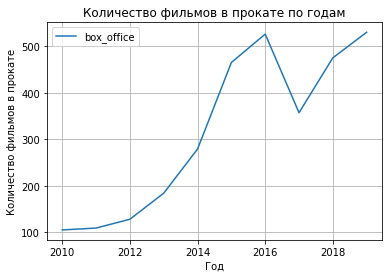

In [ ]:
data.pivot_table(index='show_year', values='box_office', aggfunc='count').plot(kind='line', grid=True)
plt.title('Количество фильмов в прокате по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов в прокате')
plt.show()

In [ ]:
data.pivot_table(index='show_year', values='box_office', aggfunc='count')

,box_office
show_year,
2010,105
2011,109
2012,128
2013,184
2014,279
2015,465
2016,526
2017,357
2018,475


Как видно, полнее всего представлен период 2016 и 2019 годов.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

**1.3.4 Динамика проката по годам.**

In [ ]:
data.pivot_table(index='show_year', values='box_office', aggfunc='sum')

,box_office
show_year,
2010,1.838768e+07
2011,2.749436e+07
2012,2.008228e+07
2013,5.069379e+07
2014,7.466560e+09
2015,3.949886e+10
2016,4.787027e+10
2017,4.856371e+10
2018,4.966840e+10


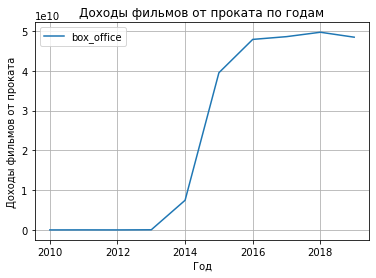

In [ ]:
data.pivot_table(index='show_year', values='box_office', aggfunc='sum').plot(kind='line', grid=True)
plt.title('Доходы фильмов от проката по годам')
plt.xlabel('Год')
plt.ylabel('Доходы фильмов от проката')
plt.show()

In [ ]:
data.pivot_table(index='show_year', values='box_office', aggfunc='sum').describe()

,box_office
count,1.000000e+01
mean,2.416102e+10
std,2.413012e+10
min,1.838768e+07
25%,3.329422e+07
50%,2.348271e+10
75%,4.828685e+10
max,4.966840e+10


Из представленного видно:
1. Сумма сборов существенно растет, начиная с 2013 года.
2. Максимальная величина сборов была в 2018 году. В 2019 году она немного снизилась.
3. Наименьшая сумма сборов зарегистрирована в 2010 году.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

**1.3.5 Медианное и среднее значение сборов для каждого года.**

In [ ]:
median_mean_box_office = data.pivot_table(index='show_year', values='box_office', aggfunc=['median', 'mean'])
median_mean_box_office.columns = ['median_box_office', 'mean_box_office']
median_mean_box_office

,median_box_office,mean_box_office
show_year,,
2010,16700.000,1.751208e+05
2011,10898.000,2.522418e+05
2012,19282.500,1.568928e+05
2013,14255.000,2.755097e+05
2014,185900.000,2.676186e+07
2015,4920933.000,8.494379e+07
2016,3846679.410,9.100811e+07
2017,9968340.000,1.360328e+08
2018,8891102.210,1.045651e+08


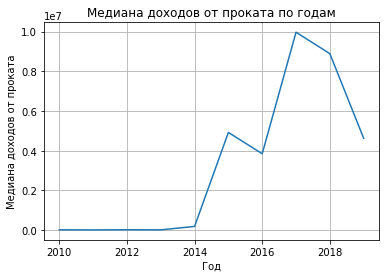

In [ ]:
median_mean_box_office['median_box_office'].plot(kind='line', grid=True)
plt.title('Медиана доходов от проката по годам')
plt.xlabel('Год')
plt.ylabel('Медиана доходов от проката')
plt.show()

Значение медианы в зависимости от года изменялось разнонаправленно и снижается с 2017 года по 2019.

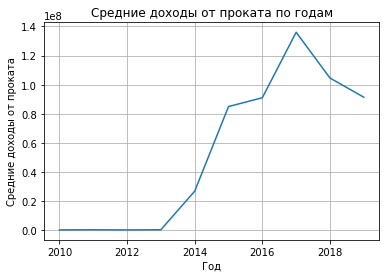

In [ ]:
median_mean_box_office['mean_box_office'].plot(kind='line', grid=True)
plt.title('Средние доходы от проката по годам')
plt.xlabel('Год')
plt.ylabel('Средние доходы от проката')
plt.show()

Среднее изменяется более плавно, но также снижается с 2017 года.

**Итог:**
1. Медианные и средние значения доходов были максимальными в 2017 году, после чего снижаются.
2. Медианные и средние значения доходов до 2017 года в общем случаи росли, в 2016 году на медианных доходах наблюдается локальный минимум.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

**1.3.6 Влияние возрастного ограничения на сборы фильма в прокате.**

Сперва построим сводную таблицу.

In [ ]:
stat_age = data.pivot_table(index='show_year', columns='age_restriction', values='box_office', aggfunc='sum')
stat_age.columns = ['0+', '12+', '16+', '18+', '6+']
stat_age

,0+,12+,16+,18+,6+
show_year,,,,,
2010,4.844651e+06,1.788476e+06,8.828042e+06,2.926510e+06,NaN
2011,1.428409e+07,4.585521e+06,7.134753e+06,1.040000e+06,4.500000e+05
2012,3.325423e+06,1.737104e+06,9.977486e+06,2.480280e+06,2.561990e+06
2013,4.198812e+06,2.757367e+07,8.909810e+06,7.953451e+06,2.058052e+06
2014,3.757770e+08,2.594687e+09,5.515128e+08,2.212560e+09,1.732023e+09
2015,3.792744e+08,1.361608e+10,1.136827e+10,5.432308e+09,8.702928e+09
2016,1.507184e+08,1.220445e+10,1.666485e+10,6.794529e+09,1.205572e+10
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,1.010497e+10


В сводной таблице получилось пропущенное значение. Заполним его медианой для дальнейшего анализа.

In [ ]:
stat_age['6+'] = stat_age.fillna(stat_age.loc[:, '0+':'18+'].median())
stat_age


,0+,12+,16+,18+,6+
show_year,,,,,
2010,4.844651e+06,1.788476e+06,8.828042e+06,2.926510e+06,4.844651e+06
2011,1.428409e+07,4.585521e+06,7.134753e+06,1.040000e+06,1.428409e+07
2012,3.325423e+06,1.737104e+06,9.977486e+06,2.480280e+06,3.325423e+06
2013,4.198812e+06,2.757367e+07,8.909810e+06,7.953451e+06,4.198812e+06
2014,3.757770e+08,2.594687e+09,5.515128e+08,2.212560e+09,3.757770e+08
2015,3.792744e+08,1.361608e+10,1.136827e+10,5.432308e+09,3.792744e+08
2016,1.507184e+08,1.220445e+10,1.666485e+10,6.794529e+09,1.507184e+08
2017,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09,2.295989e+08
2018,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09,3.244900e+07


Столбец 6+ находится нелогично в конце таблицы. Изменим положение столбца.

In [ ]:
stat_age = stat_age[['0+', '6+', '12+', '16+', '18+']]
stat_age

,0+,6+,12+,16+,18+
show_year,,,,,
2010,4.844651e+06,4.844651e+06,1.788476e+06,8.828042e+06,2.926510e+06
2011,1.428409e+07,1.428409e+07,4.585521e+06,7.134753e+06,1.040000e+06
2012,3.325423e+06,3.325423e+06,1.737104e+06,9.977486e+06,2.480280e+06
2013,4.198812e+06,4.198812e+06,2.757367e+07,8.909810e+06,7.953451e+06
2014,3.757770e+08,3.757770e+08,2.594687e+09,5.515128e+08,2.212560e+09
2015,3.792744e+08,3.792744e+08,1.361608e+10,1.136827e+10,5.432308e+09
2016,1.507184e+08,1.507184e+08,1.220445e+10,1.666485e+10,6.794529e+09
2017,2.295989e+08,2.295989e+08,7.851428e+09,1.874504e+10,9.651496e+09
2018,3.244900e+07,3.244900e+07,1.426729e+10,1.650360e+10,8.760086e+09


Построим диаграмму зависимости сборов от года по всем возрастным рейтингам.

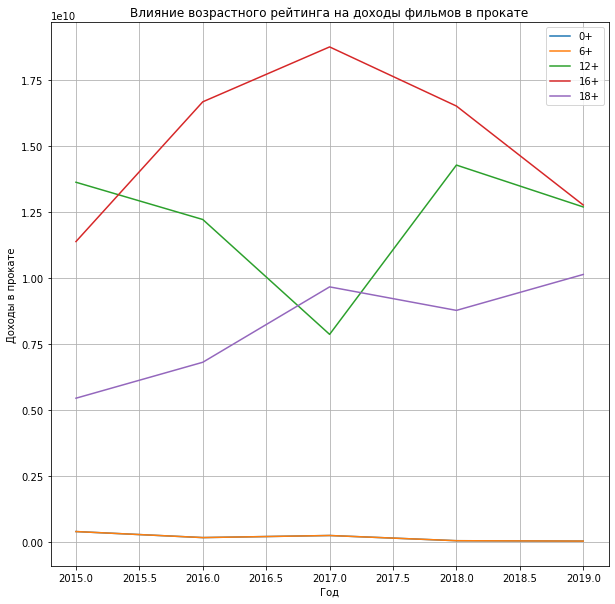

In [ ]:
stat_age.loc['2015':'2019', :'18+'].plot(kind='line', grid=True, figsize=(10, 10))
plt.title('Влияние возрастного рейтинга на доходы фильмов в прокате')
plt.xlabel('Год')
plt.ylabel('Доходы в прокате')
plt.show()

Как видно из диаграммы, больше всего денег в прокате приносят фильмы 16+, но у них к 2019 году выручка сравнялась с фильмами 12+. В то же время тенденция на рост наблюдается у выручки фильмов 18+. Фильмы 0+ и 6+ приносят одинаковое количество денег и их выручка снижается.

Дополнительно построим диаграмму размаха сборов в прокате по возрастным категориям.

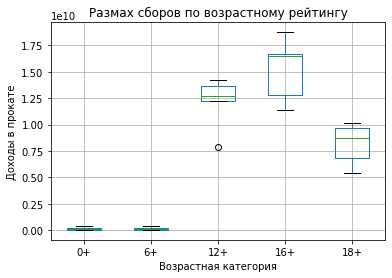

In [ ]:
stat_age.loc['2015':'2019', :'18+'].boxplot()
plt.title('Размах сборов по возрастному рейтингу')
plt.xlabel('Возрастная категория')
plt.ylabel('Доходы в прокате')
plt.show()

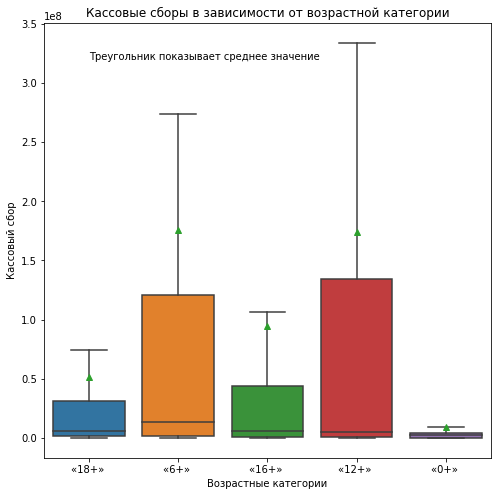

In [ ]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['show_year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории',
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

Как видно из диаграммы, для фильмов категории 16+ размаз достаточно большой, но медиана находится в верхней части третьего квартиля. Следовательно, значительная часть фильмов приносит большой доход.

**Итог:**
1. Проведен анализ по общей доле фильмов в прокате. Доля фильмов в прокате составляет около 42% от всех выходящих фильмов.
2. Проведен анализ по изменению доли фильмов в прокате в зависимости от года. За период анализа количество фильмов, выходящих в прокат, стабильно увеличивается.
3. Посчитано медианное и среднее значения дохода от проката для каждого года. Наибольшие медианные и средние значения приходятся на 2017 год.
4. Оценено влияение возрастной категории фильма на доходы от проката. Так, наибольший доход приносят фильмы категории 16+, но в последнее время их доходы снижаются.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

**1.4.1 Диаграммы рассеивания рейтинга фильма от размера гос. поддержки в абсолютных величинах и в относительных.**

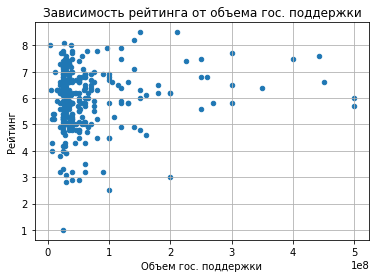

In [ ]:
data_grant = data[data['refundable_support'].notna()]
data_grant['summary_support'] = data_grant['refundable_support'] + data_grant['nonrefundable_support']
data_grant.plot(x='summary_support', y='ratings', kind='scatter', grid=True)
plt.title('Зависимость рейтинга от объема гос. поддержки')
plt.xlabel('Объем гос. поддержки')
plt.ylabel('Рейтинг')
plt.show()

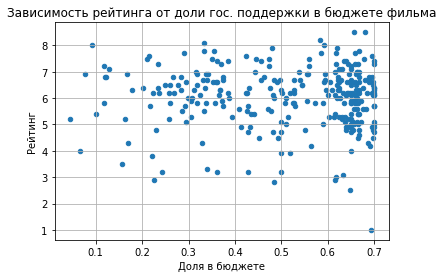

In [ ]:
data_grant.plot(x='ratio_budget', y='ratings', kind='scatter', grid=True)
plt.title('Зависимость рейтинга от доли гос. поддержки в бюджете фильма')
plt.xlabel('Доля в бюджете')
plt.ylabel('Рейтинг')
plt.show()

In [ ]:
data_grant.pivot_table(index='ratio_budget', values='ratings', aggfunc='mean').describe()

,ratings
count,269.000000
mean,6.024257
std,1.125544
min,1.000000
25%,5.400000
50%,6.200000
75%,6.700000
max,8.500000


Очевидно, что нет зависимости между увеличением поддержки на рейтинг фильма ни в относительных, ни в абсолютных величинах.  
Как видно, фильмы, на которое выделяется гос.финансирование, имеют средний рейтинг 6. Медианная не сильно отличается от средней.

**1.4.2 Окупаемость фильмов.**

Теперь посмотрим на окупаемость фильмов. Предварительно отбросим строки, где бюджет равен нулю или есть пропуски в бюджете. Их немного, но они помешают анализу.

In [ ]:
data_grant = data_grant.dropna(subset=['budget'])
data_grant = data_grant.query('budget > 0')

Введем новый столбец - окупаемость (payback). Единица в этом столбце будет означать, что доходы фильма сравнялись с расходами, значения меньше единицы - фильм убыточный, больше единицы - фильм принес прибыль.

In [ ]:
data_grant['payback'] = data_grant['box_office'] / data_grant['budget']

In [ ]:
data_grant['payback'].describe()

count    301.000000
mean       0.763310
std        1.672880
min        0.000017
25%        0.022548
50%        0.148664
75%        0.783883
max       19.209804
Name: payback, dtype: float64

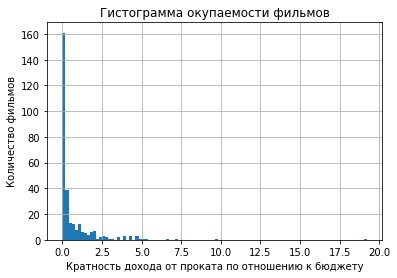

In [ ]:
data_grant['payback'].hist(bins=100)
plt.title('Гистограмма окупаемости фильмов')
plt.xlabel('Кратность дохода от проката по отношению к бюджету')
plt.ylabel('Количество фильмов')
plt.show()

Очевидно, что большинство значений около 0, то есть фильмы не окупились. Случаи, когда значение больше 1, редки.

**1.4.3 Жанры, на которое выделяется гос. поддержка.**

Теперь посмотрим на какие жанры деньги выделяются чаще всего.

In [ ]:
data_grant.query('main_genre != "Нет информации"').pivot_table(index='main_genre', values='summary_support', aggfunc=['count', 'sum'])

#Старая версия:
#data_grant.pivot_table(index='main_genre', values='summary_support', aggfunc=['count', 'sum'])

,count,sum
,summary_support,summary_support
main_genre,,
биография,3,1.125100e+08
боевик,5,2.540000e+08
военный,9,4.220009e+08
детектив,5,4.850000e+08
детский,4,1.190000e+08
драма,92,5.239407e+09
история,4,1.020000e+09
комедия,68,2.983283e+09


Фильмы в жанре "драма" получают поддержку чаще.

**1.4.4 Величина государственной поддержки в зависимости от года.**

Теперь посмотрим в каком году больше раз выделяли финансирование.

In [ ]:
data_grant.pivot_table(index='show_year', values='summary_support', aggfunc=['count', 'sum'])

,count,sum
,summary_support,summary_support
show_year,,
2013,2,1.343479e+08
2014,15,5.490023e+08
2015,80,3.227241e+09
2016,58,3.977155e+09
2017,39,3.098972e+09
2018,52,3.098000e+09
2019,69,4.724000e+09


Наибольшее количество раз выделяли финансирование в 2015 году, но по общей сумме в 2019 году.

**1.4.5 Возрастная категория фильмов, на которые выделяется гос. поддержка.**

Теперь посмотрим на фильмы какого возрастного рейтинга чаще всего выделяют деньги.

In [ ]:
data_grant.pivot_table(index='age', values='summary_support', aggfunc=['count', 'sum'])

,count,sum
,summary_support,summary_support
age,,
«0+»,8,2.735200e+08
«12+»,103,7.463394e+09
«16+»,118,5.241053e+09
«18+»,27,9.533469e+08
«6+»,59,4.877404e+09


Чаще выделяют деньги на фильмы 16+, но по общей сумме большая поддержка предоставляется на фильмы 12+.

**1.4.6 Поддержка фильмов по государственным структурам.**

Посмотрим, какой государственная структура больше и чаще выделяет финансирование.

In [ ]:
data_grant.pivot_table(index='financing_source', values='summary_support', aggfunc=['count', 'sum'])

,count,sum
,summary_support,summary_support
financing_source,,
Министерство культуры,163,4.830661e+09
"Министерство культуры, Фонд кино",21,1.162431e+09
Фонд кино,131,1.281563e+10


Министерство культуры выделяет деньги чаще, чем Фонд кино, но Фонд кино выделяет большее финансирование.

**Итог:**
1. Проведен анализ по окупаемости фильмов с гос. поддержкой.
2. Проведен анализ по рейтингам фильмов с гос. поддержкой.
3. Проведен анализ, какие фильмы и с какой возрастной категорией чаще получают поддержку.

### Шаг 5. Напишите общий вывод

**Предварительная обработка данных.**
1. В представленных данных имеются лишние символы, опечатки и дубликаты. Так, имеются задвоенные номера прокатных удостоверений, неверное написание фильмов, разные варианты написания имени режиссеров и т.д.
2. В предоставленной информации имеются пропуски в некоторых столбцах, среди которых столбцы с бюджетом фильма, с доходами от проката и объемами государственного финансирования.
3. В рамках предварительной подготовки были удалены или откорректированы некорректные значения в столбцах с рейтингом, бюджетом, доходом от проката. Кроме того, были изменены типы данных там, где это было необходимо.
4. Добавлены новые столбцы на основе представленной информации. Среди этих столбцов: имя главного режиссера, год выхода фильма, доля государственного финансирования в общем бюджете фильма.

**Анализ представленной информации.**  
По результатам исследования установлено:  
1. Доля фильмов, показанных в кинотеатрах, с 2010 года растет.
2. Максимальный доход от проката был в 2018 году, после чего он снизился.
3. Наибольший доход до 2019 года приносили фильмы категории 16+, но в 2019 году доход от фильмов категорий 12+ и 16+ практически сравнялся. Вместе с тем постоянно растет доход фильмов с категорией 18+, но до уровня категорий 12+ и 16+ ещё не доходит.
4. Государственное финансирование не влияет на рейтинг фильма, так как не наблюдается зависимость между объемом финансирования и оценками фильма после выхода.
5. Чаще всего государственные структуры поддерживают фильмы в жанре драма. При этом фильмы категории 12+ получают большее финансирование.

**Мероприятия для повышения качества анализа.**  
В целях улучшения качества анализа желательно:
1. Дополнить данные информацией по общим бюджетам фильмов, величине финансирования и доходам от проката.
2. Откорректировать сбор данных для предотвращения записи дубликатов и ошибок в названиях фильмов, именах режиссеров и т.д.
3. Предоставить информацию за более поздний период (после 2020 года).